<a href="https://colab.research.google.com/github/antypko/followThePlane/blob/master/low_code_chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline

In [4]:
url = 'https://storage.googleapis.com/low-code-ai-book/financial_transactions.csv'

transaction_df = pd.read_csv(url)


In [5]:
transaction_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
transaction_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
cols = ['type', 'nameOrig', 'nameDest']
transaction_df[cols].describe()

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [10]:
transaction_df['isCorrect'] = (transaction_df['isFraud']==transaction_df['isFlaggedFraud'])
transaction_df['isCorrect'].sum()


6354423

In [12]:
(transaction_df['isFraud']*transaction_df['isCorrect']).sum()

16

<Axes: xlabel='type'>

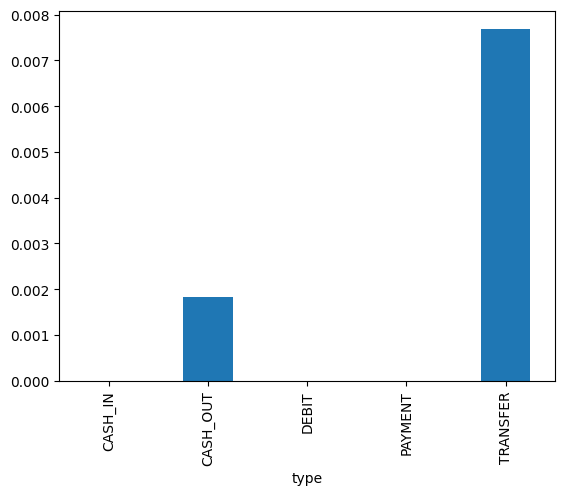

In [13]:
transaction_df.groupby('type')['isFraud'].mean().plot.bar()

In [14]:
transaction_df.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64

<Axes: xlabel='amountBkts'>

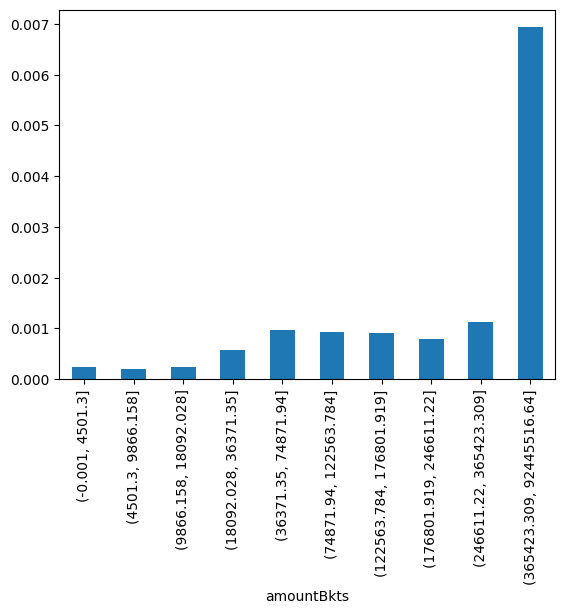

In [15]:
transaction_df['amountBkts'] = pd.qcut(transaction_df['amount'], 10)
transaction_df.groupby('amountBkts')['isFraud'].mean().plot.bar()

<Axes: xlabel='amountBkts100'>

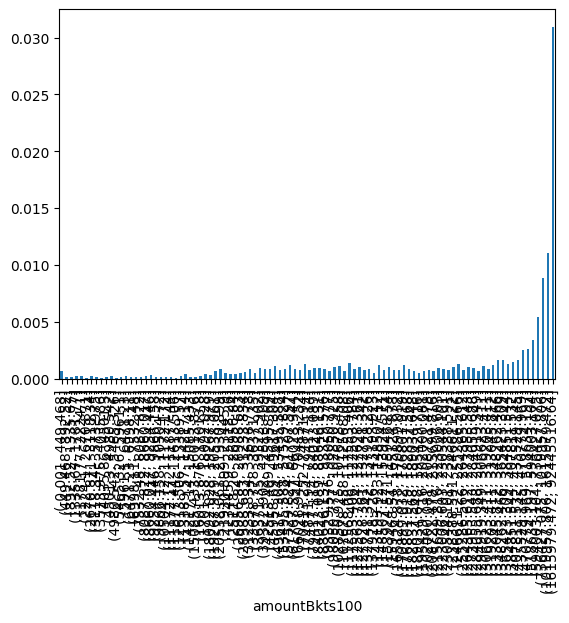

In [19]:
transaction_df['amountBkts100'] = pd.qcut(transaction_df['amount'], 100)
transaction_df.groupby('amountBkts100')['isFraud'].mean().plot.bar()

<Axes: xlabel='oldbalanceOrgBkts'>

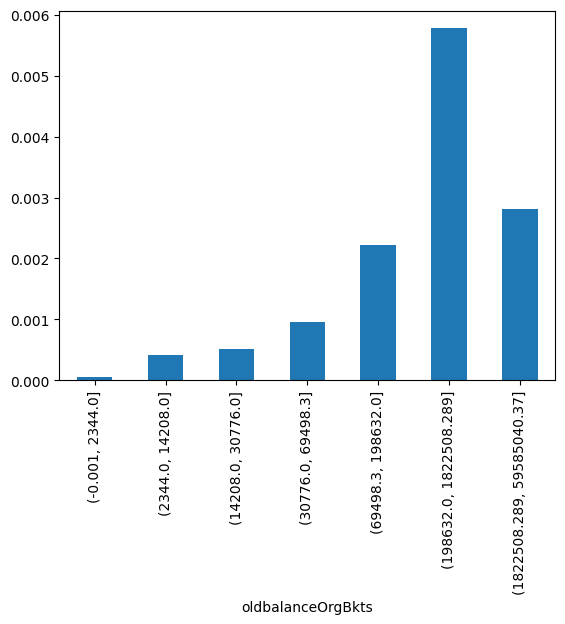

In [20]:
transaction_df['oldbalanceOrgBkts'] = pd.qcut(transaction_df['oldbalanceOrg'], 10,
                        duplicates='drop')
transaction_df.groupby('oldbalanceOrgBkts')['isFraud'].mean().plot.bar()

<Axes: xlabel='oldbalanceOrgBkts100'>

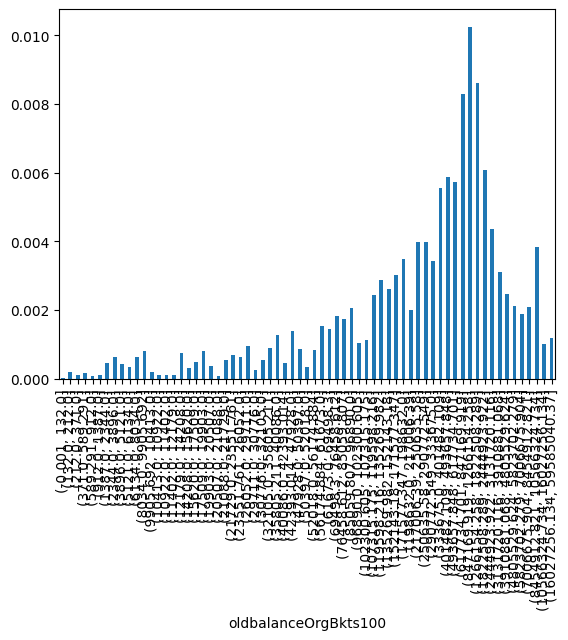

In [21]:
transaction_df['oldbalanceOrgBkts100'] = pd.qcut(transaction_df['oldbalanceOrg'], 100,
                        duplicates='drop')
transaction_df.groupby('oldbalanceOrgBkts100')['isFraud'].mean().plot.bar()

<Axes: xlabel='oldbalanceOrgBkts50'>

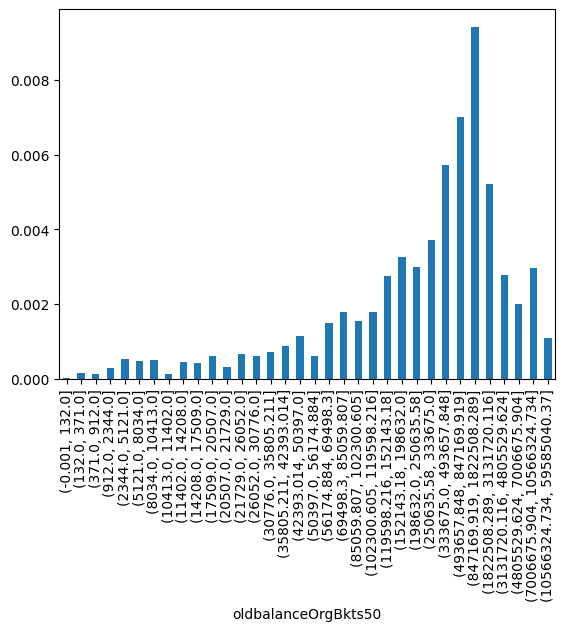

In [23]:
transaction_df['oldbalanceOrgBkts50'] = pd.qcut(transaction_df['oldbalanceOrg'], 50,
                        duplicates='drop')
transaction_df.groupby('oldbalanceOrgBkts50')['isFraud'].mean().plot.bar()

In [ ]:
transaction_df['newbalanceOrigBkts'] = pd.qcut(transaction_df['newbalanceOrig'], 10,
                                              duplicates='drop')
transaction_df.groupby('newbalanceOrigBkts')['isFraud'].mean().plot.bar()